In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # library to plot and visualize data
from scipy import stats

In [2]:
# Defining the datatype of each column for reading the CSV file
dataTypes = {
    "UniqueID": np.int64,
    "disbursed_amount": np.float64,
    "asset_cost": np.float64,
    "ltv": np.float64,
    "branch_id": np.object,
    "supplier_id": np.object,
    "manufacturer_id": np.object,
    "Current_pincode_ID": np.object,
    "Date.of.Birth": np.object,
    "Employment.Type": np.object,
    "DisbursalDate": np.object,
    "State_ID": np.object,
    "Employee_code_ID": np.object,
    "MobileNo_Avl_Flag": np.uint8,
    "Aadhar_flag": np.uint8,
    "PAN_flag": np.uint8,
    "VoterID_flag": np.uint8,
    "Driving_flag": np.uint8,
    "Passport_flag": np.uint8,
    "PERFORM_CNS.SCORE": np.uint8,
    "PERFORM_CNS.SCORE.DESCRIPTION": np.object,
    "PRI.NO.OF.ACCTS": np.uint8,
    "PRI.ACTIVE.ACCTS": np.uint8,
    "PRI.OVERDUE.ACCTS": np.uint8,
    "PRI.CURRENT.BALANCE": np.float64,
    "PRI.SANCTIONED.AMOUNT": np.float64,
    "PRI.DISBURSED.AMOUNT": np.float64,
    "SEC.NO.OF.ACCTS": np.uint8,
    "SEC.ACTIVE.ACCTS": np.uint8,
    "SEC.OVERDUE.ACCTS": np.uint8,
    "SEC.CURRENT.BALANCE": np.float64,
    "SEC.SANCTIONED.AMOUNT": np.float64,
    "SEC.DISBURSED.AMOUNT": np.float64,
    "PRIMARY.INSTAL.AMT": np.float64,
    "SEC.INSTAL.AMT": np.float64,
    "NEW.ACCTS.IN.LAST.SIX.MONTHS": np.uint8,
    "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS": np.uint8,
    "AVERAGE.ACCT.AGE": np.object,
    "CREDIT.HISTORY.LENGTH": np.object,
    "NO.OF_INQUIRIES": np.uint8,
    "loan_default": np.uint8
}

# Input data files are available in the "../data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
train = pd.read_csv("data/train.csv", dtype=dataTypes)

Shape of Train : (233154, 41)

Load default distribution :


0    182543
1     50611
Name: loan_default, dtype: int64

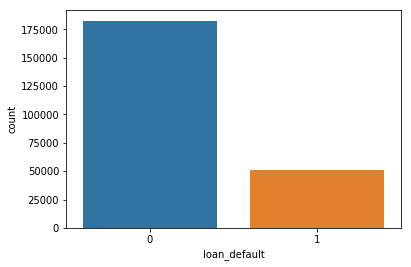

In [7]:
print("Shape of Train :", trainRaw.shape)
print("\nLoad default distribution :")
sns.countplot(x=trainRaw.loan_default)
train.loan_default.value_counts()

In [16]:
train.branch_id.nunique()

82

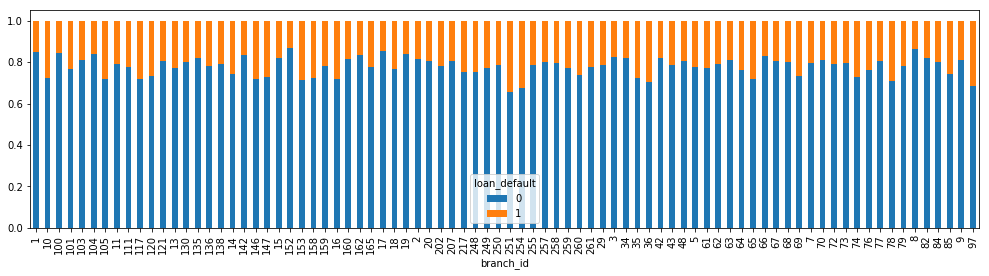

In [10]:
ct = pd.crosstab(train.branch_id, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

In [5]:
train.supplier_id.nunique()

2953

In [17]:
train.manufacturer_id.nunique()

11

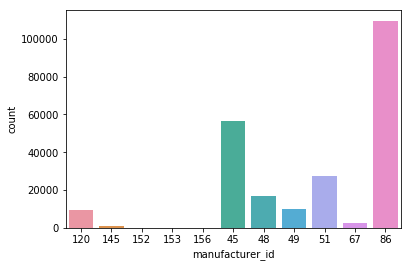

In [28]:
sns.countplot(x = train.manufacturer_id)

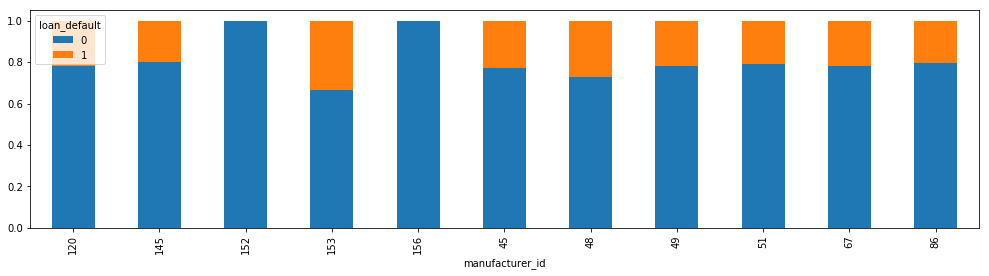

In [14]:
ct = pd.crosstab(train.manufacturer_id, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

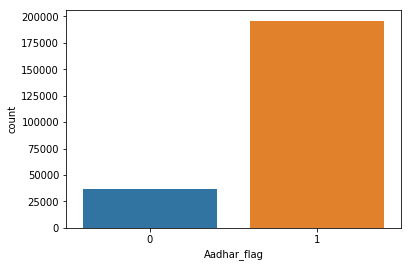

In [36]:
sns.countplot(x = train.Aadhar_flag)

(403.0748379341479,
 1.1791998402218374e-89,
 1,
 array([[ 29148.44218842,   8081.55781158],
        [153394.55781158,  42529.44218842]]))

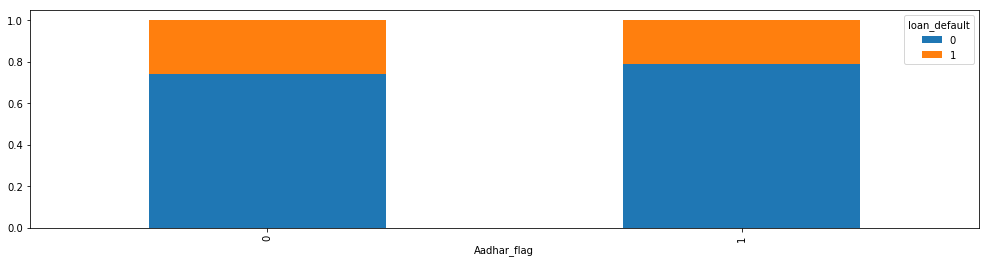

In [20]:
ct = pd.crosstab(train.Aadhar_flag, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
stats.chi2_contingency(ct)

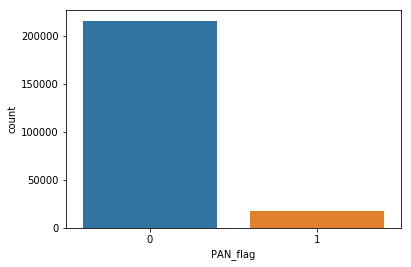

In [37]:
sns.countplot(x = train.PAN_flag)

(0.957671117865875,
 0.3277743362589148,
 1,
 array([[168747.01021213,  46785.98978787],
        [ 13795.98978787,   3825.01021213]]))

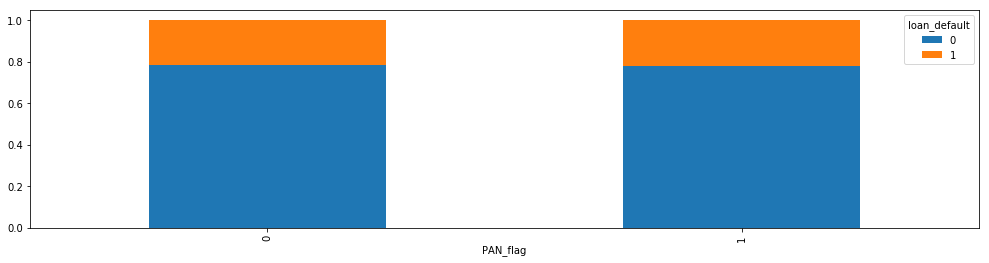

In [21]:
ct = pd.crosstab(train.PAN_flag, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
stats.chi2_contingency(ct)

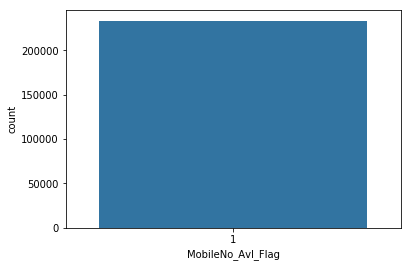

In [38]:
sns.countplot(x = train.MobileNo_Avl_Flag)

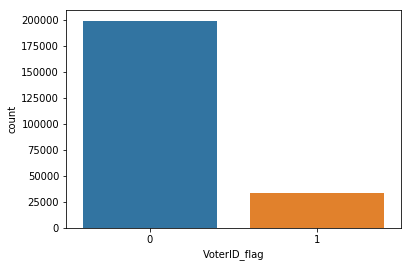

In [39]:
sns.countplot(x = train.VoterID_flag)

(445.90884255981064,
 5.603683381655361e-99,
 1,
 array([[156084.70144197,  43275.29855803],
        [ 26458.29855803,   7335.70144197]]))

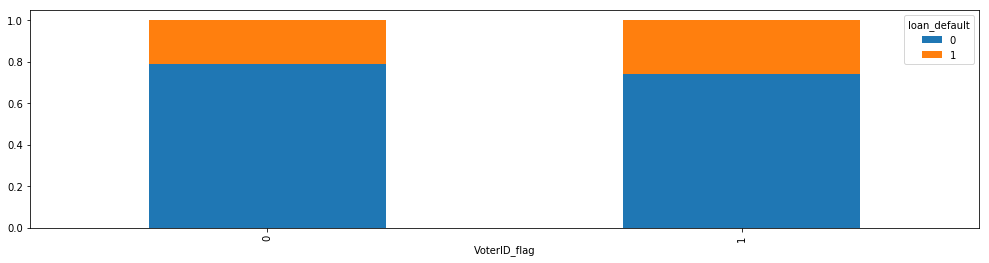

In [23]:
ct = pd.crosstab(train.VoterID_flag, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
stats.chi2_contingency(ct)

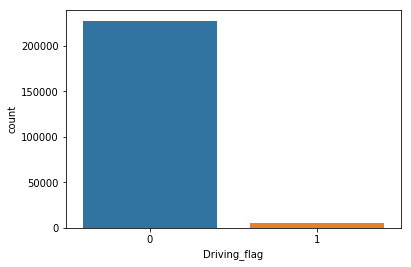

In [40]:
sns.countplot(x = train.Driving_flag)

(7.808087835127649,
 0.0052012912081583085,
 1,
 array([[178300.30840131,  49434.69159869],
        [  4242.69159869,   1176.30840131]]))

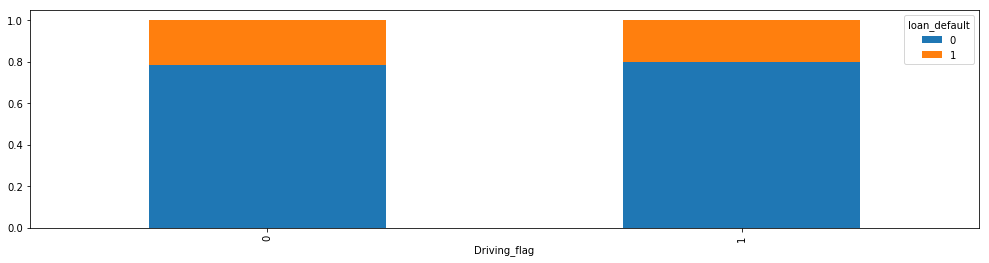

In [24]:
ct = pd.crosstab(train.Driving_flag, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
stats.chi2_contingency(ct)

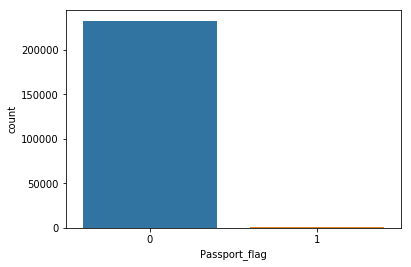

In [41]:
sns.countplot(x = train.Passport_flag)

(13.077913022819462,
 0.0002987981770071958,
 1,
 array([[1.82154667e+05, 5.05033327e+04],
        [3.88332724e+02, 1.07667276e+02]]))

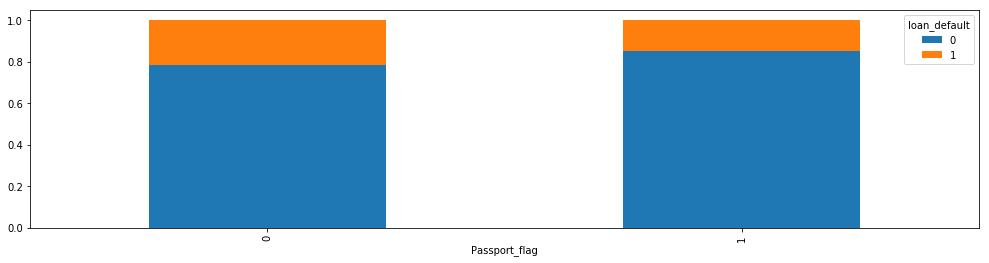

In [26]:
ct = pd.crosstab(train.Passport_flag, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
stats.chi2_contingency(ct)

In [42]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

(2192.3575555074094, 0.0, 19, array([[1.10580875e+04, 3.06591250e+03],
        [7.20372862e+03, 1.99727138e+03],
        [1.25620939e+04, 3.48290613e+03],
        [8.89250621e+03, 2.46549379e+03],
        [4.55742901e+03, 1.26357099e+03],
        [6.64315154e+03, 1.84184846e+03],
        [3.12232037e+03, 8.65679628e+02],
        [5.36697747e+03, 1.48802253e+03],
        [4.35073578e+03, 1.20626422e+03],
        [2.93441744e+03, 8.13582559e+02],
        [6.48030234e+03, 1.79669766e+03],
        [8.87841349e+02, 2.46158651e+02],
        [6.87098385e+03, 1.90501615e+03],
        [9.15635325e+04, 2.53864675e+04],
        [2.34878664e+00, 6.51213361e-01],
        [2.25874982e+03, 6.26250182e+02],
        [1.20101290e+03, 3.32987099e+02],
        [2.87491485e+03, 7.97085154e+02],
        [7.64138587e+02, 2.11861413e+02],
        [2.94772723e+03, 8.17272768e+02]]))

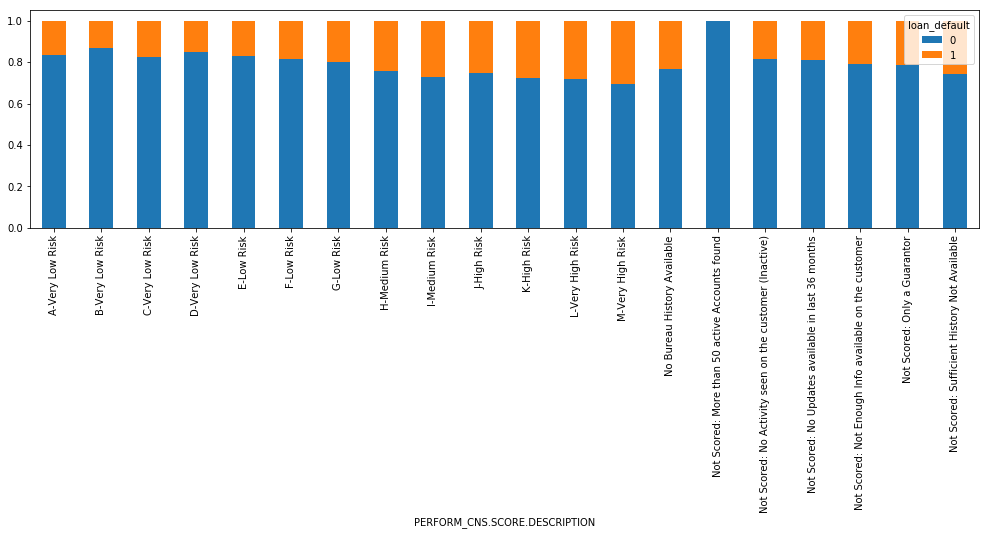

In [44]:
ct=pd.crosstab(train['PERFORM_CNS.SCORE.DESCRIPTION'], train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
stats.chi2_contingency(ct)

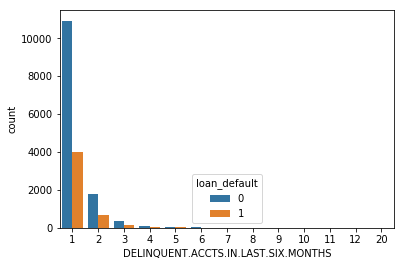

In [47]:
sns.countplot(train[train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] > 0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],
              hue=train.loan_default)

In [4]:
train['NO.OF_INQUIRIES'].value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

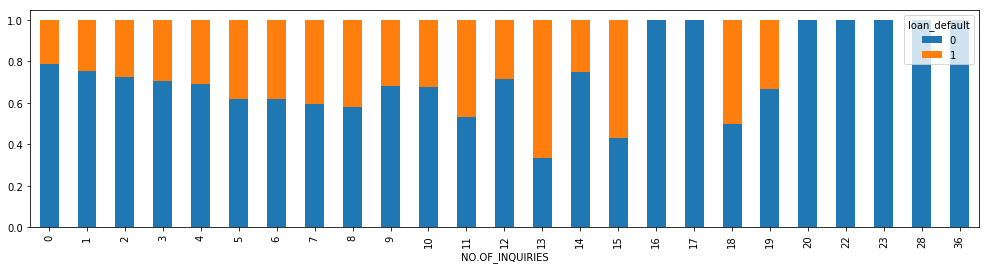

In [5]:
ct = pd.crosstab(train["NO.OF_INQUIRIES"], train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

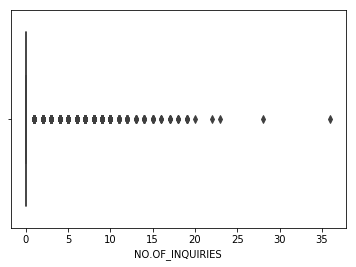

In [8]:
sns.boxplot(train["NO.OF_INQUIRIES"])

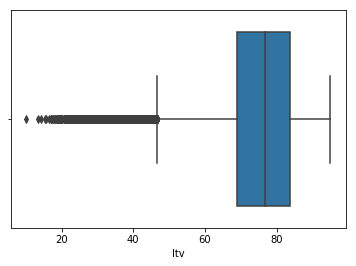

In [11]:
sns.boxplot(train["ltv"])

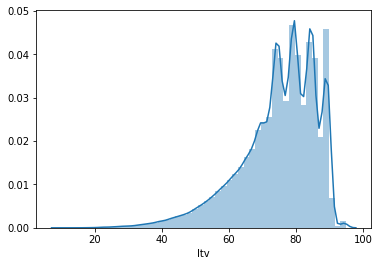

In [10]:
sns.distplot(train["ltv"])

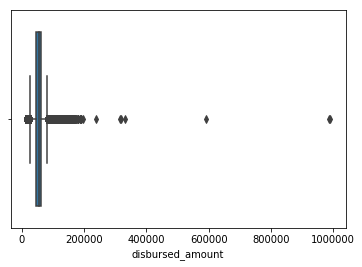

In [12]:
sns.boxplot(train["disbursed_amount"])

In [4]:
train["PERFORM_CNS.SCORE"].nunique()

573

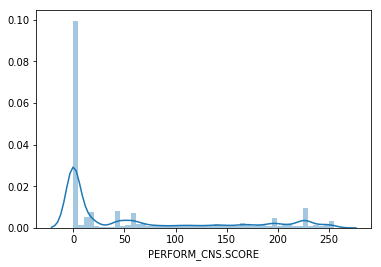

In [28]:
sns.distplot(train["PERFORM_CNS.SCORE"])

In [11]:
ct = pd.crosstab(train[train['PERFORM_CNS.SCORE'] < 900 & train['PERFORM_CNS.SCORE'] > 800]['PERFORM_CNS.SCORES'], train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [27]:
train[train['PERFORM_CNS.SCORE'] > 200]['PERFORM_CNS.SCORE']

8         206
13        226
20        238
23        226
29        218
30        246
40        207
49        205
52        245
56        250
69        237
76        251
77        237
105       251
114       251
128       251
132       226
140       231
143       221
176       251
178       251
179       237
184       250
185       226
187       226
196       226
202       237
207       246
222       234
228       226
         ... 
232931    207
232941    237
232942    222
232957    206
232961    226
232993    226
233004    226
233051    226
233055    225
233058    226
233059    226
233062    221
233064    250
233066    237
233069    253
233070    237
233092    225
233093    240
233104    251
233112    219
233115    221
233122    226
233125    230
233131    218
233132    226
233133    255
233142    226
233146    226
233147    243
233149    223
Name: PERFORM_CNS.SCORE, Length: 28029, dtype: uint8